# 0.) Import and Clean data

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [68]:
#drive.mount('/content/gdrive/', force_remount = True)

In [69]:
df = pd.read_csv("bankadditionalfull.csv", sep = ";")

In [70]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [71]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [72]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [73]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

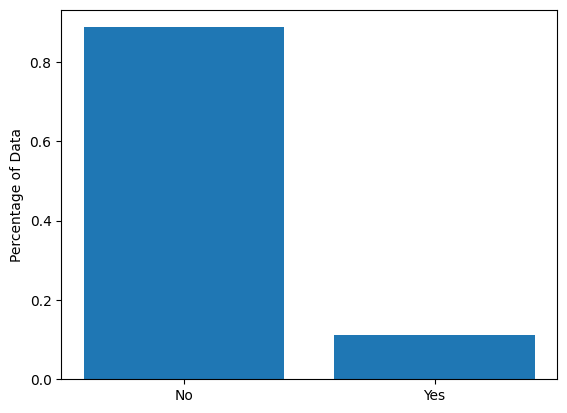

In [74]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [75]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
###############
###TRANSFORM###
###############

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [78]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.503\ngini = 0.3\nsamples = 20044\nvalue = [16367, 3677]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.103\nsamples = 10233\nvalue = [9675, 558]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.087\nsamples = 10046\nvalue = [9587, 459]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.498\nsamples = 187\nvalue = [88, 99]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.434\nsamples = 9811\nvalue = [6692, 3119]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.488\nsamples = 7128\nvalue = [4118, 3010]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.078\nsamples = 2683\nvalue = [2574, 109]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.417\nsamples = 31116\nvalue = [9213, 21903]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.723\ngini = 0.338\nsamples = 25496\nvalue = [5490, 20006]\nclass = 

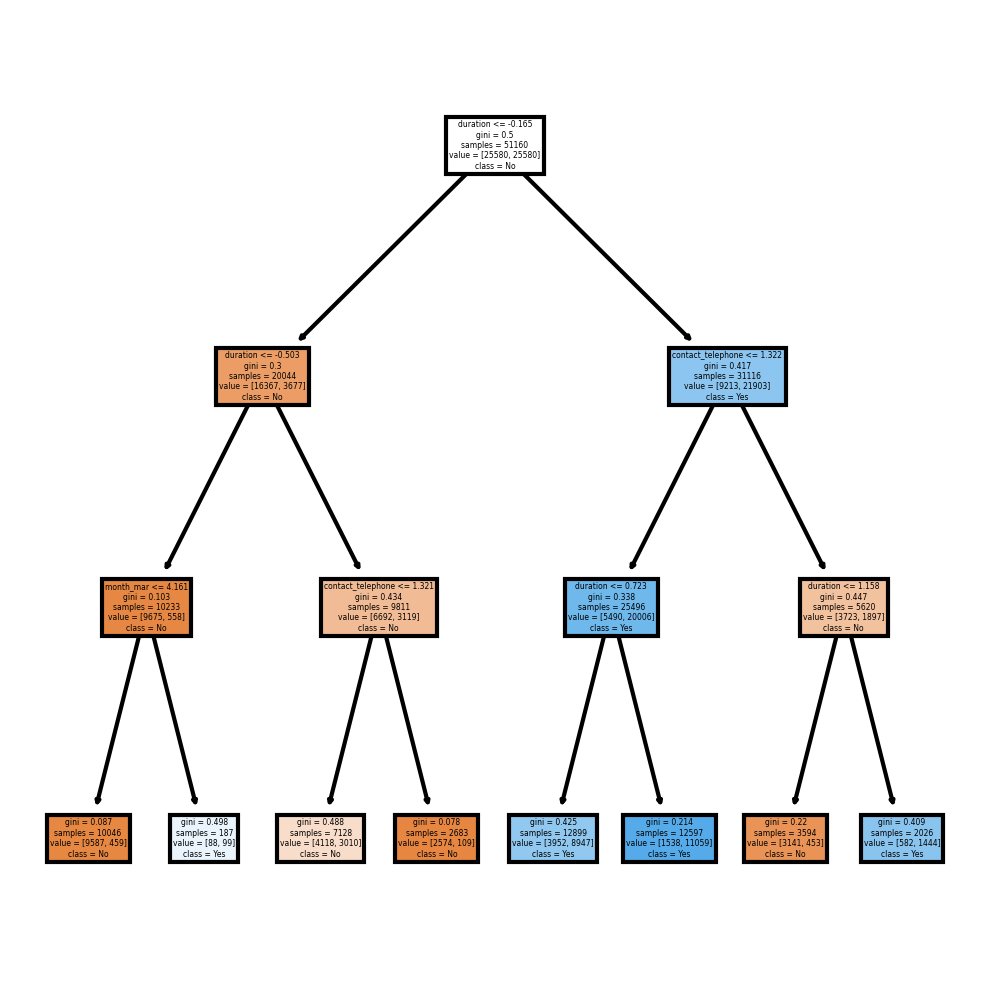

In [79]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [80]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

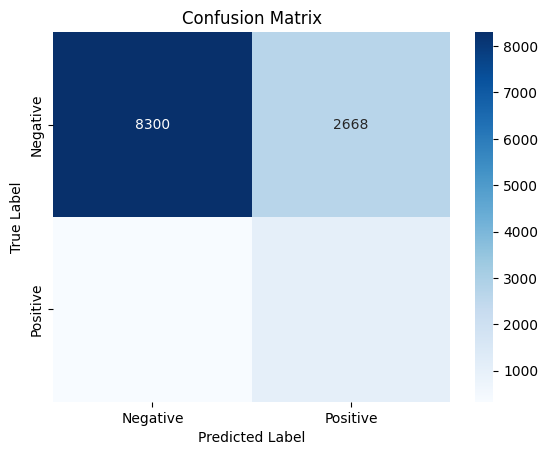

In [81]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [82]:
from sklearn.metrics import accuracy_score, f1_score

# 精度 (Accuracy) を計算
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# F1 スコアを計算
f1 = f1_score(y_true, y_pred, pos_label=1) 
print(f'F1 Score: {f1}')

Accuracy: 0.7571417010601279
F1 Score: 0.41306473694504203


# 3.) Use bagging on your descision tree

In [83]:
# Optimize on Max Depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [84]:
bagging = BaggingClassifier(estimator = dtree, n_estimators = 100, max_samples = .5, max_features = 1.)
bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

/Users/ryotaromatsubara/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

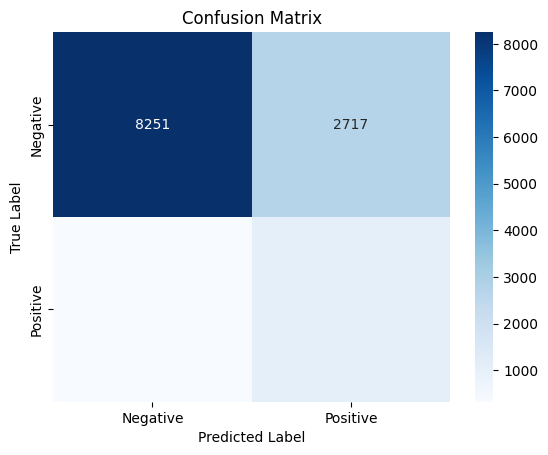

In [86]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [87]:
# 精度 (Accuracy) を計算
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# F1 スコアを計算
f1 = f1_score(y_true, y_pred, pos_label=1) 
print(f'F1 Score: {f1}')

Accuracy: 0.7539855952091932
F1 Score: 0.41221964423820573


# 4.) Boost your tree

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:

dtree = DecisionTreeClassifier(max_depth = 3)

boost = AdaBoostClassifier(estimator = dtree, n_estimators = 50)
boost.fit(X_scaled, y_train)

y_pred = boost.predict(X_test)

/Users/ryotaromatsubara/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryotaromatsubara/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


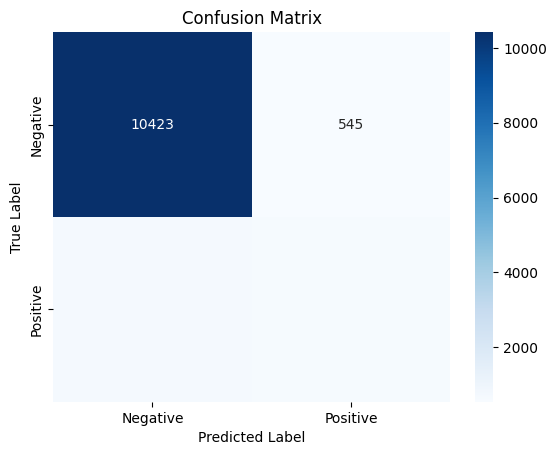

In [90]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [91]:
# 精度 (Accuracy) を計算
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# F1 スコアを計算
f1 = f1_score(y_true, y_pred, pos_label=1) 
print(f'F1 Score: {f1}')

Accuracy: 0.8963340616654528
F1 Score: 0.5048318515655199


# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
base_predictions = [list(dtree_main.predict(X_scaled)),
                   list(boost.predict(X_scaled)),
                   list(bagging.predict(X_scaled))]

In [99]:
n = len(base_predictions[0])

In [100]:
base_predictions = np.array(base_predictions).transpose()

In [101]:
super_learner = LogisticRegression()

In [102]:
super_learner.fit(base_predictions,y_train)

/Users/ryotaromatsubara/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [104]:
super_learner.coef_

array([[0.18097315, 4.98959074, 1.25258495]])

Based on the confusion matrix and accuracy metrics, the boosted model outperforms others by correctly classifying a higher number of labels. This observation is corroborated by the model's coefficient, which is 4.98, the highest among the three evaluated models. The coefficient likely represents the weight or significance attributed to the boosted model within a meta-model or an ensemble learning framework.